In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://data.cdc.gov/resource/vbim-akqf.json?$query=select%20sex,%20age_group,%20race_ethnicity_combined,death_yn%20WHERE%20(sex=%27Male%27%20OR%20sex=%27Female%27)%20AND%20(age_group%20!=%20%27Missing%27%20AND%20age_group%20!=%20%27NA%27)%20AND%20(race_ethnicity_combined%20%3C%3E%20%27Unknown%27%20AND%20race_ethnicity_combined%20%3C%3E%20%27NA%27%20AND%20race_ethnicity_combined%20%3C%3E%20%27Missing%27)%20AND%20(death_yn%20%3C%3E%20%22Missing%22%20AND%20death_yn%20%3C%3E%20%22Unknown%22)%20LIMIT%2030000000"

#Query Param for Copy Paste Testing
#https://data.cdc.gov/resource/vbim-akqf.json?$query=select sex, age_group, race_ethnicity_combined,death_yn WHERE (sex='Male' OR sex='Female') AND (age_group != 'Missing' AND age_group != 'NA') AND (race_ethnicity_combined <> 'Unknown' AND race_ethnicity_combined <> 'NA' AND race_ethnicity_combined <> 'Missing') AND (death_yn <> "Missing" AND death_yn <> "Unknown") LIMIT 30000000

In [3]:
df = pd.read_json(url)

In [4]:
len(df)

6305389

In [5]:
df.head()

,sex,age_group,race_ethnicity_combined,death_yn
0,Male,0 - 9 Years,"White, Non-Hispanic",No
1,Female,0 - 9 Years,"White, Non-Hispanic",No
2,Female,0 - 9 Years,"White, Non-Hispanic",No
3,Male,0 - 9 Years,"White, Non-Hispanic",No
4,Male,0 - 9 Years,"White, Non-Hispanic",No


In [6]:
df2 = df.copy()

# Replace Categorical Variables by Numbers

In [7]:
df2.sex.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
# Male == 1, 
# Female == 2
df2.replace(to_replace = ['Male', 'Female'], value = [1,2], inplace = True)

In [9]:
df2.age_group.unique()

array(['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '60 - 69 Years',
       '70 - 79 Years', '40 - 49 Years', '50 - 59 Years', '80+ Years',
       '30 - 39 Years'], dtype=object)

In [10]:
# 0 - 9 Years == 1
# 10 - 19 Years == 2
# 20 - 29 Years == 3
# 30 - 39 Years == 4
# 40 - 49 Years == 5
# 50 - 59 Years == 6
# 60 - 69 Years == 7
# 70 - 79 Years == 8
# 80+ Years == 9


age_group = ['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years','50 - 59 Years','60 - 69 Years', '70 - 79 Years', '80+ Years']
age_number = [1,2,3,4,5,6,7,8,9]
df2.replace(to_replace = age_group, value = age_number, inplace = True)

In [11]:
df2.race_ethnicity_combined.unique()

array(['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic',
       'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic'], dtype=object)

In [12]:
# White, Non-Hispanic == 1
# Hispanic/Latino == 2
# Black, Non-Hispanic == 3
# Asian, Non-Hispanic == 4
# Multiple/Other, Non-Hispanic == 5
# Native Hawaiian/Other Pacific Islander, Non-Hispanic == 6
# American Indian/Alaska Native, Non-Hispanic == 7

race_ethinicity = ['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic']
race_number = [1,2,3,4,5,6,7]
df2.replace(to_replace = race_ethinicity, value = race_number, inplace = True)

In [13]:
df2.death_yn.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Survived == 0, 
# Death == 1
df2.replace(to_replace = ['No', 'Yes'], value = [0,1], inplace = True)

In [15]:
df2.head()

,sex,age_group,race_ethnicity_combined,death_yn
0,1,1,1,0
1,2,1,1,0
2,2,1,1,0
3,1,1,1,0
4,1,1,1,0


# Split dataset into training, validation and test sets

In [16]:
X = df2.iloc[:, 0:3].values
y = df2.iloc[:, 3].values

In [17]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Train models on training set and tune parameters using the validation set

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state = 0)
y_pred_rm = clf.fit(X_train,y_train).predict(X_val)

In [21]:
from sklearn import metrics
print("Accuracy of the Random Forest Classifier:",metrics.accuracy_score(y_val, y_pred_rm))

Accuracy of the Random Forest Classifier: 0.9550226076420333


## Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train,y_train).predict(X_val)

In [23]:
from sklearn import metrics
print("Accuracy of the Naive Bayes Classifier:",metrics.accuracy_score(y_val, y_pred_nb))

Accuracy of the Naive Bayes Classifier: 0.9548624272249615


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
y_pred_lr = lr.fit(X_train,y_train).predict(X_val)

In [26]:
from sklearn import metrics
print("Accuracy of the Logistic Regression:",metrics.accuracy_score(y_val, y_pred_lr))

Accuracy of the Logistic Regression: 0.9544469097074091


# Compare the performances of the models on test set

In [27]:
from sklearn import metrics
y_pred_rm2 = clf.fit(X_train,y_train).predict(X_test)
y_pred_nb2 = gnb.fit(X_train,y_train).predict(X_test)
y_pred_lr2 = lr.fit(X_train,y_train).predict(X_test)

In [30]:
print("Accuracy of the Random Forest Classifier:",round(metrics.accuracy_score(y_test, y_pred_rm2),4))
print("Accuracy of the Naive Bayes Classifier:",round(metrics.accuracy_score(y_test, y_pred_nb2),4))
print("Accuracy of the Logistic Regression:",round(metrics.accuracy_score(y_test, y_pred_lr2),4))

Accuracy of the Random Forest Classifier: 0.9551
Accuracy of the Naive Bayes Classifier: 0.9549
Accuracy of the Logistic Regression: 0.9545


## ROC Curves

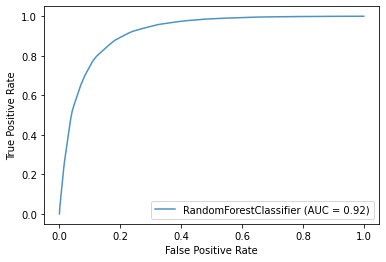

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
clf_display = plot_roc_curve(clf, X_test, y_test, ax = ax, alpha=0.8)
plt.show()

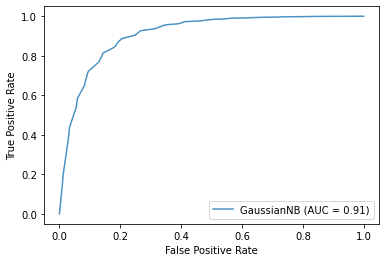

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
clf_display = plot_roc_curve(gnb, X_test, y_test, ax = ax, alpha=0.8)
plt.show()

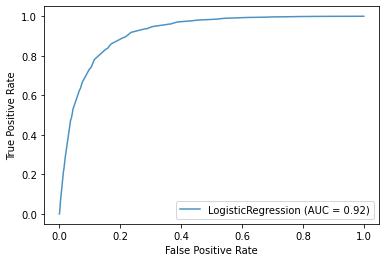

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
clf_display = plot_roc_curve(lr, X_test, y_test, ax = ax, alpha=0.8)
plt.show()

### Feature Importance from Random Forest

In [34]:
feature_names = ['Sex', 'Age Group', 'Race and Ethinicity'] 
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Age Group              0.963269
Race and Ethinicity    0.023539
Sex                    0.013192
dtype: float64

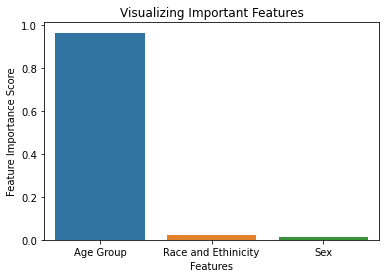

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

## Probability that a patient will die from Covid19 --- Random Forest

In [36]:
# Male == 1, 
# Female == 2

# 20 - 29 Years == 3
# 30 - 39 Years == 4
# 40 - 49 Years == 5
# 50 - 59 Years == 6
# 60 - 69 Years == 7
# 70 - 79 Years == 8
# 80+ Years == 9

# White, Non-Hispanic == 1
# Hispanic/Latino == 2
# Black, Non-Hispanic == 3
# Asian, Non-Hispanic == 4
# Multiple/Other, Non-Hispanic == 5
# Native Hawaiian/Other Pacific Islander, Non-Hispanic == 6
# American Indian/Alaska Native, Non-Hispanic == 7

prob_death = []

for s in range(1,3):
    for a in range(3,10):
        for e in range(1,8):
            patient = np.array([[s,a,e]])
            prob = round(clf.predict_proba(patient)[0][1], 3)
            prob_death.append([s,a,e,prob])
            

In [37]:
df3 = pd.DataFrame(prob_death, columns = ['Sex', 'Age Group', 'Ethnicity', 'Probability of Death']) 

In [38]:
df3["Sex"].replace(to_replace = [1,2], value = ['Male', 'Female'], inplace = True)

race_ethinicity = ['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic']
race_number = [1,2,3,4,5,6,7]
df3["Ethnicity"].replace(to_replace = race_number, value = race_ethinicity, inplace = True)

age_group = ['20 - 29 Years', '30 - 39 Years', '40 - 49 Years','50 - 59 Years','60 - 69 Years', '70 - 79 Years', '80+ Years']
age_number = [3,4,5,6,7,8,9]
df3["Age Group"].replace(to_replace = age_number, value = age_group, inplace = True)

In [39]:
df3.sort_values(by=['Probability of Death'], ascending = False, inplace = True)
df3 = df3.reset_index(drop = True)
df3.head(15)

,Sex,Age Group,Ethnicity,Probability of Death
0,Male,80+ Years,Hispanic/Latino,0.550
1,Male,80+ Years,"Asian, Non-Hispanic",0.508
2,Male,80+ Years,"Black, Non-Hispanic",0.477
3,Male,80+ Years,"American Indian/Alaska Native, Non-Hispanic",0.447
4,Female,80+ Years,Hispanic/Latino,0.425
5,Male,80+ Years,"White, Non-Hispanic",0.418
6,Female,80+ Years,"Asian, Non-Hispanic",0.414
7,Male,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",0.387
8,Female,80+ Years,"Black, Non-Hispanic",0.381
9,Male,80+ Years,"Multiple/Other, Non-Hispanic",0.347


## Probability that a patient will die from Covid19 --- Naive Bayes Classifier

In [40]:
# Male == 1, 
# Female == 2

# 20 - 29 Years == 3
# 30 - 39 Years == 4
# 40 - 49 Years == 5
# 50 - 59 Years == 6
# 60 - 69 Years == 7
# 70 - 79 Years == 8
# 80+ Years == 9

# White, Non-Hispanic == 1
# Hispanic/Latino == 2
# Black, Non-Hispanic == 3
# Asian, Non-Hispanic == 4
# Multiple/Other, Non-Hispanic == 5
# Native Hawaiian/Other Pacific Islander, Non-Hispanic == 6
# American Indian/Alaska Native, Non-Hispanic == 7

prob_death_nb = []

for s in range(1,3):
    for a in range(3,10):
        for e in range(1,8):
            patient = np.array([[s,a,e]])
            prob = round(gnb.predict_proba(patient)[0][1], 3)
            prob_death_nb.append([s,a,e,prob])

In [41]:
df4 = pd.DataFrame(prob_death_nb, columns = ['Sex', 'Age Group', 'Ethnicity', 'Probability of Death']) 

In [42]:
df4["Sex"].replace(to_replace = [1,2], value = ['Male', 'Female'], inplace = True)

race_ethinicity = ['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic']
race_number = [1,2,3,4,5,6,7]
df4["Ethnicity"].replace(to_replace = race_number, value = race_ethinicity, inplace = True)

age_group = ['20 - 29 Years', '30 - 39 Years', '40 - 49 Years','50 - 59 Years','60 - 69 Years', '70 - 79 Years', '80+ Years']
age_number = [3,4,5,6,7,8,9]
df4["Age Group"].replace(to_replace = age_number, value = age_group, inplace = True)

In [43]:
df4.sort_values(by=['Probability of Death'], ascending = False, inplace = True)
df4 = df4.reset_index(drop = True)
df4.head(15)

,Sex,Age Group,Ethnicity,Probability of Death
0,Male,80+ Years,"White, Non-Hispanic",0.424
1,Male,80+ Years,Hispanic/Latino,0.412
2,Male,80+ Years,"Black, Non-Hispanic",0.372
3,Female,80+ Years,"White, Non-Hispanic",0.353
4,Female,80+ Years,Hispanic/Latino,0.341
5,Male,80+ Years,"Asian, Non-Hispanic",0.308
6,Female,80+ Years,"Black, Non-Hispanic",0.305
7,Male,70 - 79 Years,"White, Non-Hispanic",0.290
8,Male,70 - 79 Years,Hispanic/Latino,0.279
9,Female,80+ Years,"Asian, Non-Hispanic",0.248


## Probability that a patient will die from Covid19 --- Logistic Regression

In [44]:
# Male == 1, 
# Female == 2

# 20 - 29 Years == 3
# 30 - 39 Years == 4
# 40 - 49 Years == 5
# 50 - 59 Years == 6
# 60 - 69 Years == 7
# 70 - 79 Years == 8
# 80+ Years == 9

# White, Non-Hispanic == 1
# Hispanic/Latino == 2
# Black, Non-Hispanic == 3
# Asian, Non-Hispanic == 4
# Multiple/Other, Non-Hispanic == 5
# Native Hawaiian/Other Pacific Islander, Non-Hispanic == 6
# American Indian/Alaska Native, Non-Hispanic == 7

prob_death_lr = []

for s in range(1,3):
    for a in range(3,10):
        for e in range(1,8):
            patient = np.array([[s,a,e]])
            prob = round(lr.predict_proba(patient)[0][1], 3)
            prob_death_lr.append([s,a,e,prob])

In [45]:
df5 = pd.DataFrame(prob_death_lr, columns = ['Sex', 'Age Group', 'Ethnicity', 'Probability of Death']) 

In [46]:
df5["Sex"].replace(to_replace = [1,2], value = ['Male', 'Female'], inplace = True)

race_ethinicity = ['White, Non-Hispanic', 'Hispanic/Latino', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic']
race_number = [1,2,3,4,5,6,7]
df5["Ethnicity"].replace(to_replace = race_number, value = race_ethinicity, inplace = True)

age_group = ['20 - 29 Years', '30 - 39 Years', '40 - 49 Years','50 - 59 Years','60 - 69 Years', '70 - 79 Years', '80+ Years']
age_number = [3,4,5,6,7,8,9]
df5["Age Group"].replace(to_replace = age_number, value = age_group, inplace = True)

In [47]:
df5.sort_values(by=['Probability of Death'], ascending = False, inplace = True)
df5 = df5.reset_index(drop = True)
df5.head(15)

,Sex,Age Group,Ethnicity,Probability of Death
0,Male,80+ Years,"American Indian/Alaska Native, Non-Hispanic",0.540
1,Male,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",0.521
2,Male,80+ Years,"Multiple/Other, Non-Hispanic",0.503
3,Male,80+ Years,"Asian, Non-Hispanic",0.485
4,Male,80+ Years,"Black, Non-Hispanic",0.466
5,Male,80+ Years,Hispanic/Latino,0.448
6,Male,80+ Years,"White, Non-Hispanic",0.430
7,Female,80+ Years,"American Indian/Alaska Native, Non-Hispanic",0.418
8,Female,80+ Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",0.401
9,Female,80+ Years,"Multiple/Other, Non-Hispanic",0.383
